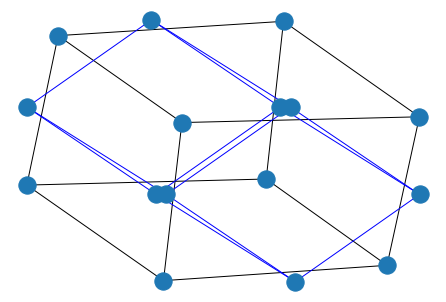

In [267]:
import networkx as nx
from numpy import *
G=nx.cubical_graph()
nx.draw(G)
nx.draw(G,pos=nx.spectral_layout(G), nodecolor='r',edge_color='b')

In [268]:
graph = nx.Graph()
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')
graph.nodes()

NodeView(('A', 'B', 'C'))

In [269]:
def add_edge(f_item, s_item, graph=None):
  graph.add_edge(f_item, s_item)
  graph.add_edge(s_item, f_item) 


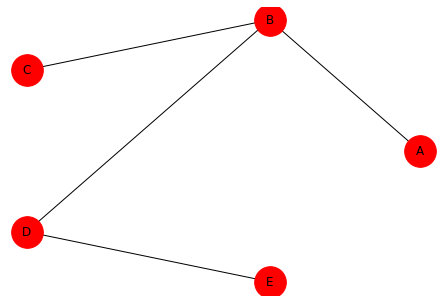

In [270]:
add_edge('A', 'B', graph=graph)
add_edge('B', 'C', graph=graph)
add_edge('B', 'D', graph=graph)
add_edge('D', 'E', graph=graph)

nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

In [271]:
#Граф Эрдьёша-Реньи

import itertools
import random

def random_graph(n:int, p:double, rnd=None) -> nx.Graph:
  gr = nx.Graph()
  N_range = range(n)
  gr.add_nodes_from(N_range)
   
  for pair in itertools.permutations(N_range, 2):
    if random.random()  < p:
      gr.add_edge(*pair)
   
  return gr

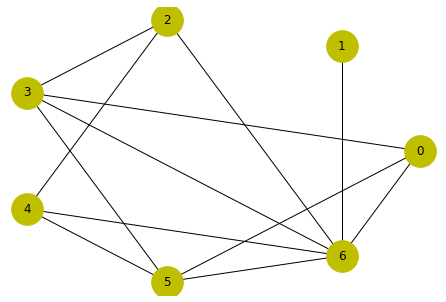

In [272]:
gr = random_graph(7, 0.5)

nx.draw_circular(gr,
         node_color='y',
         node_size=1000,
         with_labels=True)

In [273]:
list(nx.bfs_edges(gr, 0))

[(0, 3), (0, 6), (0, 5), (3, 2), (6, 1), (6, 4)]

[0, 2, 3, 4, 5, 6]

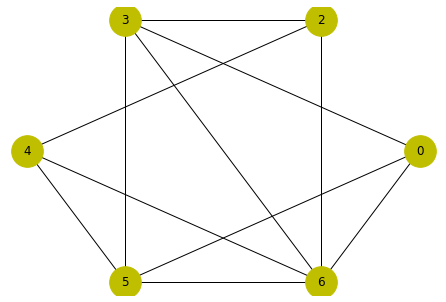

In [274]:
gr.remove_node(1)
nx.draw_circular(gr,
         node_color='y',
         node_size=1000,
         with_labels=True)

list(gr)

[3, 4, 5]

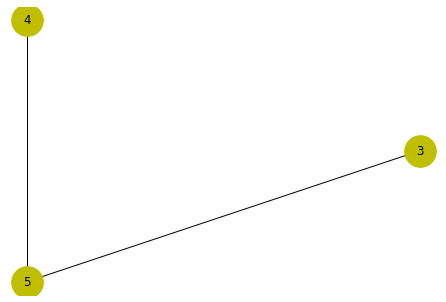

In [275]:
sub = gr.subgraph([3, 4, 5])

nx.draw_circular(sub,
         node_color='y',
         node_size=1000,
         with_labels=True)

list(sub)

[0, 1, 2]
[0, 1, 3]
[0, 2, 3]
[1, 2, 3]


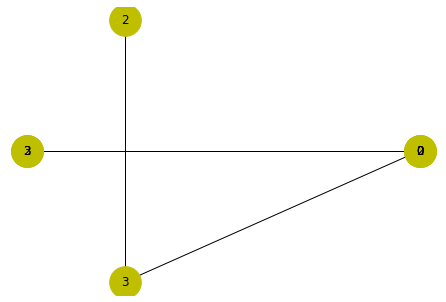

In [276]:
from itertools import product

def comb(n, k):
    """Генерация сочетаний из `n` по `k` без повторений."""

    d = list(range(0, k))
    yield d

    while True:
        i = k - 1
        while i >= 0 and d[i] + k - i + 1 > n:
            i -= 1
        if i < 0:
            return

        d[i] += 1
        for j in range(i + 1, k):
            d[j] = d[j - 1] + 1

        yield d

for c in comb(4, 3):
    print(c)
    nx.draw_circular(gr.subgraph(c),
         node_color='y',
         node_size=1000,
         with_labels=True)
    